<a href="https://colab.research.google.com/github/BrianIto/ML_DEN_RNA/blob/main/One_Hot_Encoding_na_proteina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ns1 = pd.read_csv('NS4B_protein.csv')

In [4]:
#Transforma String do vetor do CSV em vetor.
sequences = ns1["sequences"].str.replace("[", "")
sequences = sequences.str.replace("]", "")
sequences = sequences.str.replace("'", "")
sequences = np.array(sequences.str.split(", "))
ns1.sequences = sequences
ns1.shape

(126, 4)

In [5]:
#Severa == 1 e Classica == 0
ns1["Label"] = (ns1["outcome"] == "Severa").astype(int)

train_labels = np.array(ns1["Label"])
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [6]:
data_dict = {}

#Cria Dicionário de Frequência
for i, sequence in enumerate(np.array(ns1["sequences"])):
  for j, codon in enumerate(sequence):
    if (codon in data_dict):
      data_dict[codon] += 1
    else:
      data_dict[codon] = 1

#Cria Dicionário de Ranking de Aparição
def getMaior(dict):
  max, maxKey = -1, ''
  for key in dict:
    if (max < dict[key]):
      max = dict[key]
      maxKey = key
  return max, maxKey
  
size = len(data_dict.keys())

data_dict_copy = data_dict.copy()
dict_final = {}

for i in range(0, size):
  max, maxKey = getMaior(data_dict_copy)
  del data_dict_copy[maxKey]
  dict_final[maxKey] = i

print(size)
dict_final

72


{'--A': 68,
 '--G': 66,
 '-AC': 70,
 '-AU': 64,
 '-GG': 71,
 '-UU': 69,
 'AAA': 2,
 'AAC': 3,
 'AAG': 44,
 'AAU': 10,
 'ACA': 6,
 'ACC': 25,
 'ACG': 55,
 'ACU': 41,
 'AGA': 18,
 'AGC': 1,
 'AGG': 16,
 'AGU': 14,
 'AUA': 34,
 'AUC': 53,
 'AUG': 11,
 'AUU': 24,
 'C--': 63,
 'CAA': 17,
 'CAC': 23,
 'CAG': 32,
 'CAU': 0,
 'CCA': 9,
 'CCC': 52,
 'CCG': 62,
 'CCU': 12,
 'CGA': 59,
 'CGC': 60,
 'CGG': 47,
 'CGU': 58,
 'CUA': 37,
 'CUC': 42,
 'CUG': 33,
 'CUU': 43,
 'GAA': 5,
 'GAC': 20,
 'GAG': 36,
 'GAU': 19,
 'GCA': 29,
 'GCC': 31,
 'GCG': 61,
 'GCU': 15,
 'GGA': 4,
 'GGC': 21,
 'GGG': 27,
 'GGU': 51,
 'GUA': 56,
 'GUC': 50,
 'GUG': 40,
 'GUU': 30,
 'U--': 67,
 'UAA': 57,
 'UAC': 46,
 'UAG': 48,
 'UAU': 38,
 'UCA': 35,
 'UCC': 39,
 'UCG': 65,
 'UCU': 8,
 'UGA': 13,
 'UGC': 28,
 'UGG': 7,
 'UGU': 49,
 'UUA': 45,
 'UUC': 54,
 'UUG': 22,
 'UUU': 26}

In [7]:
for i in range(0, ns1["sequences"].shape[0]):
  for j in range(0, len(ns1["sequences"].loc[i])):
    ns1["sequences"].loc[i][j] = dict_final[ns1["sequences"].loc[i][j]]

In [ ]:
ns1

,sequences,serotype,outcome,outcome_bin,Label
0,"[3, 5, 11, 4, 22, 22, 5, 41, 6, 2, 18, 19, 45,...",3,Classica,Classica,0
1,"[3, 5, 11, 4, 22, 22, 5, 41, 6, 2, 18, 19, 45,...",3,Classica,Classica,0
2,"[10, 5, 11, 4, 37, 22, 5, 41, 6, 44, 18, 19, 4...",3,Classica,Classica,0
3,"[10, 5, 11, 4, 33, 33, 5, 25, 6, 44, 18, 20, 4...",3,Classica,Classica,0
4,"[10, 5, 11, 4, 33, 33, 5, 41, 6, 44, 18, 19, 4...",3,Classica,Classica,0
...,...,...,...,...,...
121,"[13, 38, 13, 32, 7, 32, 9, 11, 18, 7, 19, 38, ...",1,Classica,Classica,0
122,"[13, 38, 13, 32, 7, 32, 9, 11, 18, 7, 19, 38, ...",1,Severa,Severa,1
123,"[13, 38, 13, 32, 7, 32, 9, 11, 18, 7, 19, 38, ...",1,Classica,Classica,0
124,"[13, 38, 13, 32, 7, 32, 9, 11, 18, 7, 19, 49, ...",1,Classica,Classica,0


In [13]:
arr = np.array(ns1.sequences)

matriz = []
for i, lista in enumerate(arr):
  matriz_dispersao = np.zeros(size)
  for j, elem in enumerate(lista):
    matriz_dispersao[elem] += 1
  matriz.append(matriz_dispersao.astype(int))

train_data = np.array(matriz)
train_data.shape
ns1["matriz_disp"] = matriz
ns1

,sequences,serotype,outcome,outcome_bin,Label,matriz_disp
0,"[3, 5, 11, 4, 22, 22, 5, 41, 6, 2, 18, 19, 45,...",3,Classica,Classica,0,"[2, 2, 8, 5, 12, 6, 15, 5, 5, 9, 3, 11, 1, 0, ..."
1,"[3, 5, 11, 4, 22, 22, 5, 41, 6, 2, 18, 19, 45,...",3,Classica,Classica,0,"[2, 2, 8, 5, 12, 6, 14, 5, 5, 9, 3, 11, 2, 0, ..."
2,"[10, 5, 11, 4, 37, 22, 5, 41, 6, 44, 18, 19, 4...",3,Classica,Classica,0,"[2, 2, 7, 4, 12, 7, 15, 5, 3, 10, 4, 11, 2, 0,..."
3,"[10, 5, 11, 4, 33, 33, 5, 25, 6, 44, 18, 20, 4...",3,Classica,Classica,0,"[2, 2, 8, 4, 11, 6, 14, 5, 4, 10, 4, 11, 2, 0,..."
4,"[10, 5, 11, 4, 33, 33, 5, 41, 6, 44, 18, 19, 4...",3,Classica,Classica,0,"[2, 2, 7, 3, 11, 6, 14, 5, 4, 10, 5, 10, 2, 0,..."
...,...,...,...,...,...,...
121,"[13, 38, 13, 32, 7, 32, 9, 11, 18, 7, 19, 38, ...",1,Classica,Classica,0,"[3, 1, 8, 1, 6, 2, 5, 14, 2, 12, 3, 4, 4, 14, ..."
122,"[13, 38, 13, 32, 7, 32, 9, 11, 18, 7, 19, 38, ...",1,Severa,Severa,1,"[3, 1, 8, 1, 7, 2, 5, 13, 3, 12, 3, 5, 4, 14, ..."
123,"[13, 38, 13, 32, 7, 32, 9, 11, 18, 7, 19, 38, ...",1,Classica,Classica,0,"[3, 1, 8, 1, 6, 2, 5, 13, 3, 12, 3, 5, 4, 14, ..."
124,"[13, 38, 13, 32, 7, 32, 9, 11, 18, 7, 19, 49, ...",1,Classica,Classica,0,"[4, 1, 8, 1, 6, 3, 6, 13, 2, 10, 3, 6, 4, 13, ..."


In [14]:
import tensorflow as tf

print(train_data.shape)
#tf.constant(train_data)
train_data

series = ns1["matriz_disp"].copy()
slist = series.to_list()
train_data = np.array(slist)

(126, 72)


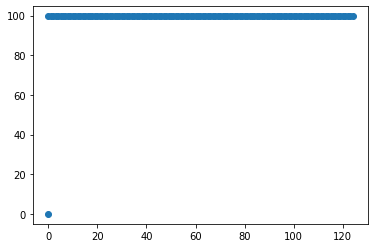

In [15]:
arr = np.array(ns1["matriz_disp"].to_list())

totalCodons = arr.shape[1]
totalSequences = arr.shape[0]

x = np.zeros(totalSequences);
y = np.zeros(totalSequences);

for index, sequence in enumerate(arr):
  if (index + 1 < totalSequences):
    differenceMatrix = np.zeros(totalSequences)
    counter = 0
    for i, codon in enumerate(sequence):
      if (i + 1  < totalCodons):
        if (codon != arr[index + 1][i + 1]):
          differenceMatrix[i] += 1
          counter += 1
    #print("Posição: " + str(index) + ", Taxa de Igualdade: " + str(100 - (counter / totalSequences)))
    x[index] = index;
    y[index] = 100 - (counter / totalSequences)
  
plt.scatter(x, y)
plt.show()

In [25]:
from keras import models, Model
from keras import layers 

def build_model():
    inputs = layers.Input(shape=(size,)) # placeholder
    x = layers.Dense(32, activation='relu')(inputs)
    out = layers.Dense(1, activation='sigmoid')( x )

    model = Model(inputs=[inputs], outputs=[out], name="mnits_model")

    model.summary()

    model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model
  
modelito = build_model()

halfShape = int(np.floor(( ns1.shape[0] /2 )))

history = modelito.fit(train_data[:halfShape], train_labels[:halfShape], epochs=20, batch_size=512, 
                      validation_data=(train_data[halfShape: ns1.shape[0]], train_labels[ halfShape: ns1.shape[0] ]))

Model: "mnits_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 72)]              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2336      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.8278 - accuracy: 0.4762 - val_loss: 0.7800 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 25ms/step - loss: 0.6500 - accuracy: 0.7460 - val_loss: 0.6759 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 26ms/step - loss: 0.5899 - accuracy: 0.7778 - val_loss

In [19]:
print(train_data)

[[2 2 8 ... 0 0 0]
 [2 2 8 ... 0 0 0]
 [2 2 7 ... 0 0 0]
 ...
 [3 1 8 ... 0 0 0]
 [4 1 8 ... 0 0 0]
 [4 1 9 ... 0 0 0]]


In [20]:
print(train_labels)

[0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
